In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("pizza_sales.csv")

In [11]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [7]:
df.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

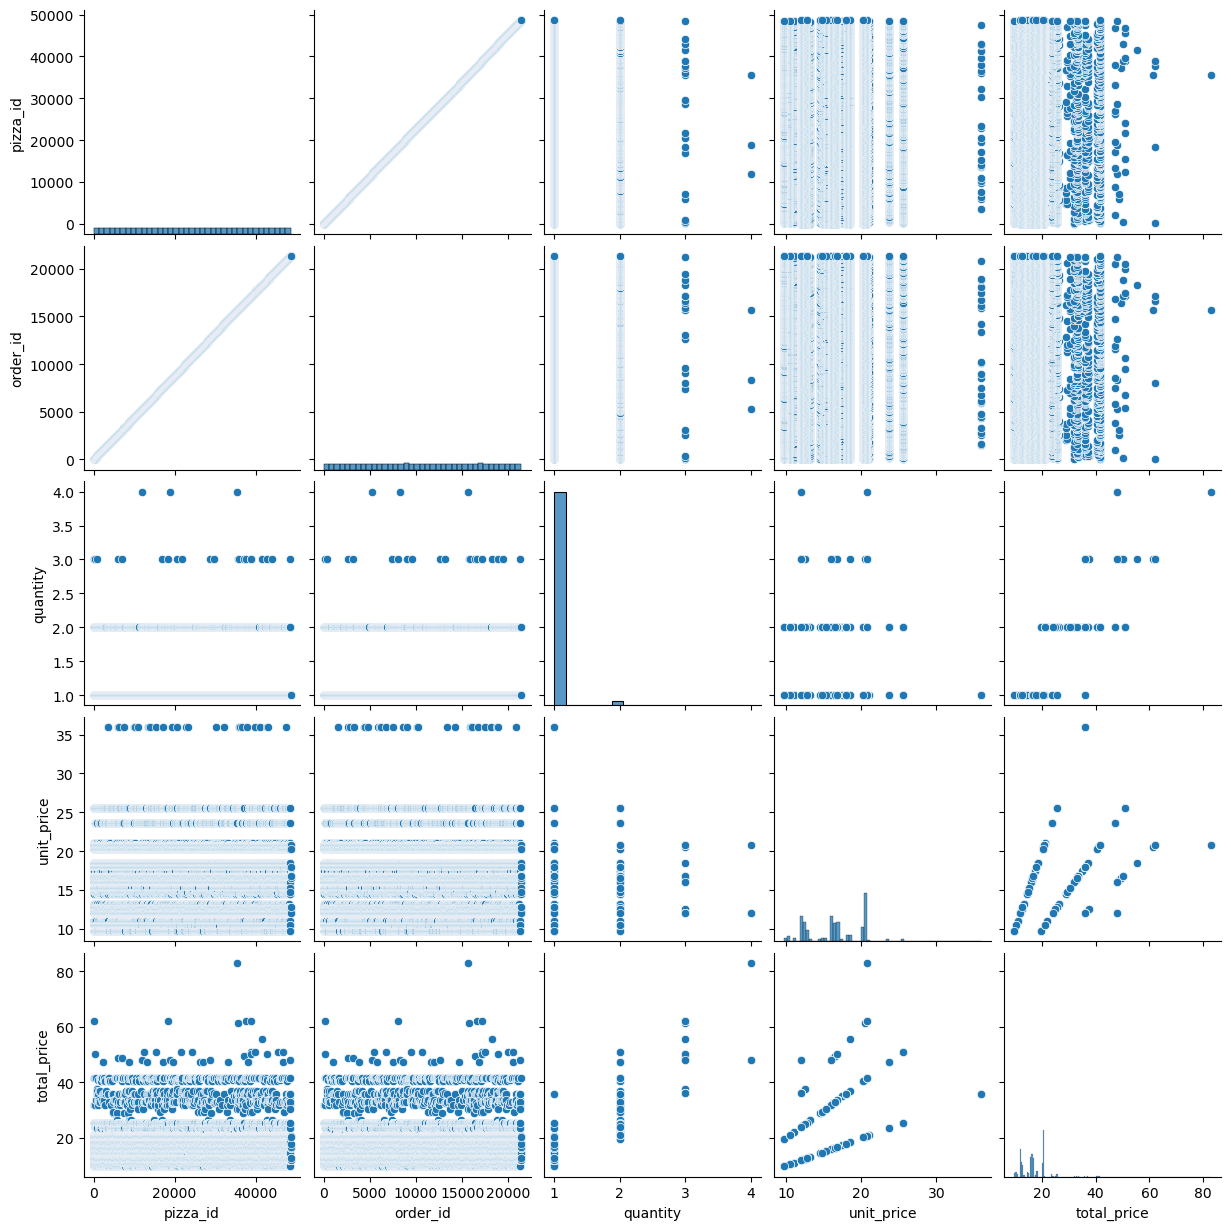

In [10]:
sns.pairplot(df)
plt.show()

In [12]:
# Convert date and time columns
df['order_date'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y')
df['order_time'] = pd.to_datetime(df['order_time']).dt.time

C:\Users\HP-LSG\AppData\Local\Temp\ipykernel_13248\4137506747.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_time'] = pd.to_datetime(df['order_time']).dt.time


In [13]:

# Total Revenue
total_revenue = df['total_price'].sum()
print(f"Total Revenue: ${total_revenue:.2f}")

# Total Orders
total_orders = df['order_id'].nunique()
print(f"Total Orders: {total_orders}")

# Average Order Value
avg_order_value = total_revenue / total_orders
print(f"Average Order Value: ${avg_order_value:.2f}")

# Total Pizzas Sold
total_pizzas = df['quantity'].sum()
print(f"Total Pizzas Sold: {total_pizzas}")


Total Revenue: $817860.05
Total Orders: 21350
Average Order Value: $38.31
Total Pizzas Sold: 49574


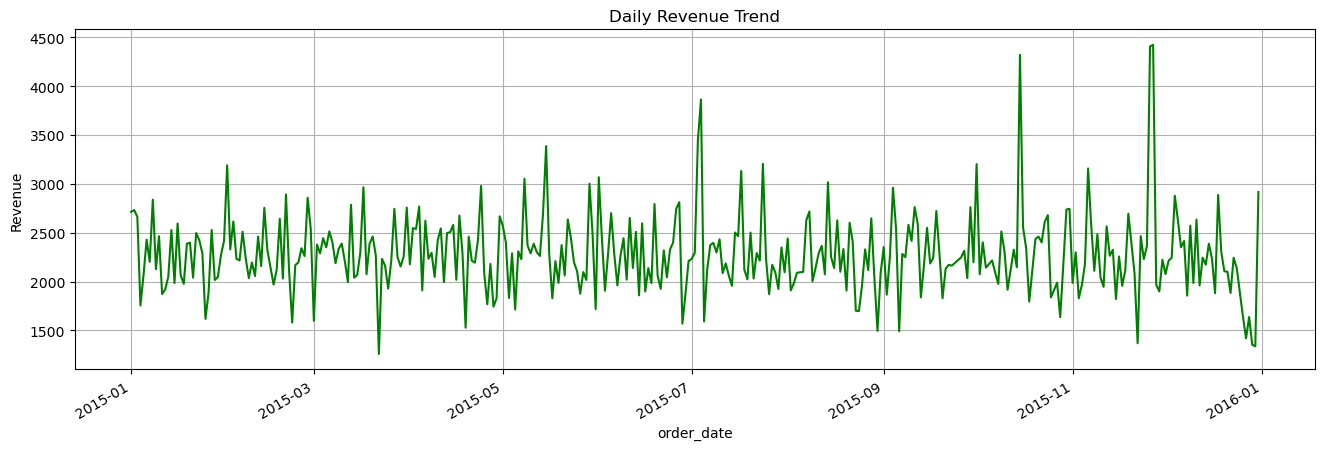

In [14]:
plt.figure(figsize=(16, 5))
# 1. Daily Sales Trend
daily_sales = df.groupby('order_date')['total_price'].sum()
daily_sales.plot(title='Daily Revenue Trend', color='green')
plt.ylabel("Revenue")
plt.grid(True)
plt.show()

C:\Users\HP-LSG\AppData\Local\Temp\ipykernel_13248\887596583.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_hour'] = pd.to_datetime(df['order_time'].astype(str)).dt.hour
C:\Users\HP-LSG\AppData\Local\Temp\ipykernel_13248\887596583.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='order_hour', data=df, palette="Blues")


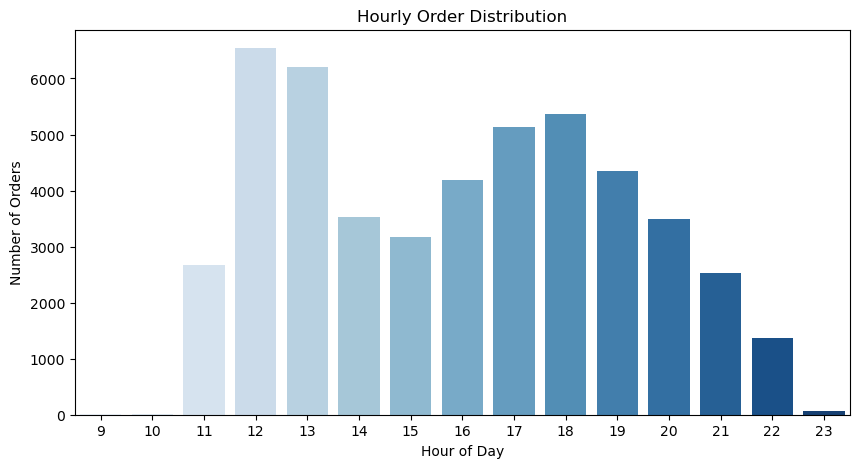

In [15]:
# 2. Hourly Order Distribution
df['order_hour'] = pd.to_datetime(df['order_time'].astype(str)).dt.hour
plt.figure(figsize=(10, 5))
sns.countplot(x='order_hour', data=df, palette="Blues")
plt.title('Hourly Order Distribution')
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.show()

C:\Users\HP-LSG\AppData\Local\Temp\ipykernel_13248\2109162122.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pizza_category', y='quantity', data=df, estimator=sum, palette='Set2')


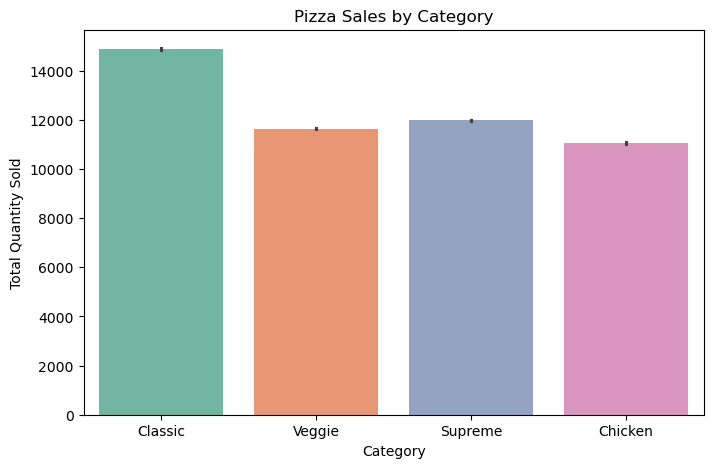

In [16]:
# 3. Category-wise Pizza Sales
plt.figure(figsize=(8, 5))
sns.barplot(x='pizza_category', y='quantity', data=df, estimator=sum, palette='Set2')
plt.title('Pizza Sales by Category')
plt.xlabel("Category")
plt.ylabel("Total Quantity Sold")
plt.show()

C:\Users\HP-LSG\AppData\Local\Temp\ipykernel_13248\4235758092.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pizza_size', y='quantity', data=df, estimator=sum, palette='Set1')


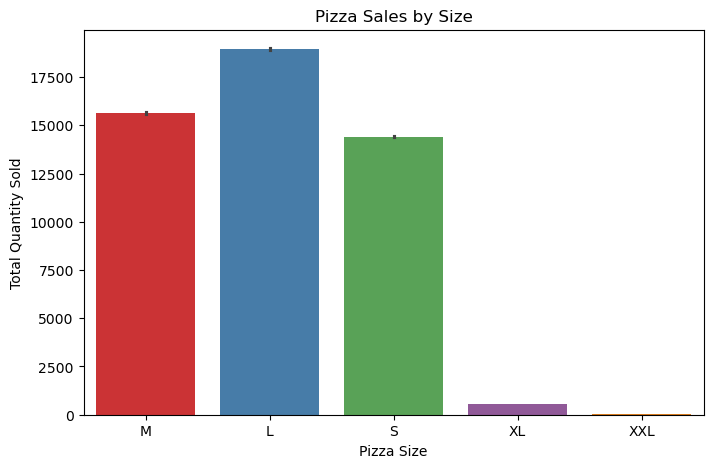

In [17]:
# 4. Pizza Size Sales
plt.figure(figsize=(8, 5))
sns.barplot(x='pizza_size', y='quantity', data=df, estimator=sum, palette='Set1')
plt.title('Pizza Sales by Size')
plt.xlabel("Pizza Size")
plt.ylabel("Total Quantity Sold")
plt.show()

In [25]:
# Group by pizza_name
pizza_group = df.groupby('pizza_name').agg({
    'total_price': 'sum',
    'order_id': 'nunique',
    'quantity': 'sum'
}).reset_index().rename(columns={
    'total_price': 'Total Revenue',
    'order_id': 'Order Count',
    'quantity': 'Total Quantity Sold'
})




In [26]:
# Sort for Top 5 and Bottom 5
top_5_revenue = pizza_group.sort_values(by='Total Revenue', ascending=False).head(5)
bottom_5_revenue = pizza_group.sort_values(by='Total Revenue', ascending=True).head(5)

top_5_orders = pizza_group.sort_values(by='Order Count', ascending=False).head(5)
bottom_5_orders = pizza_group.sort_values(by='Order Count', ascending=True).head(5)

top_5_sales = pizza_group.sort_values(by='Total Quantity Sold', ascending=False).head(5)
bottom_5_sales = pizza_group.sort_values(by='Total Quantity Sold', ascending=True).head(5)

In [27]:
# Display results
print("\nTop 5 Pizzas by Revenue:")
print(top_5_revenue)

print("\nBottom 5 Pizzas by Revenue:")
print(bottom_5_revenue)

print("\nTop 5 Pizzas by Order Count:")
print(top_5_orders)

print("\nBottom 5 Pizzas by Order Count:")
print(bottom_5_orders)

print("\nTop 5 Pizzas by Quantity Sold:")
print(top_5_sales)

print("\nBottom 5 Pizzas by Quantity Sold:")
print(bottom_5_sales)



Top 5 Pizzas by Revenue:
                      pizza_name  Total Revenue  Order Count  \
30        The Thai Chicken Pizza       43434.25         2225   
0     The Barbecue Chicken Pizza       42768.00         2273   
4   The California Chicken Pizza       41409.50         2197   
7       The Classic Deluxe Pizza       38180.50         2329   
26       The Spicy Italian Pizza       34831.25         1822   

    Total Quantity Sold  
30                 2371  
0                  2432  
4                  2370  
7                  2453  
26                 1924  

Bottom 5 Pizzas by Revenue:
                   pizza_name  Total Revenue  Order Count  Total Quantity Sold
2        The Brie Carre Pizza       11588.50          480                  490
11     The Green Garden Pizza       13955.75          976                  997
28  The Spinach Supreme Pizza       15277.75          918                  950
16    The Mediterranean Pizza       15360.50          912                  934
27    The

C:\Users\HP-LSG\AppData\Local\Temp\ipykernel_13248\3368515211.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Revenue', y='pizza_name', data=top_5_revenue, palette='Greens_d')


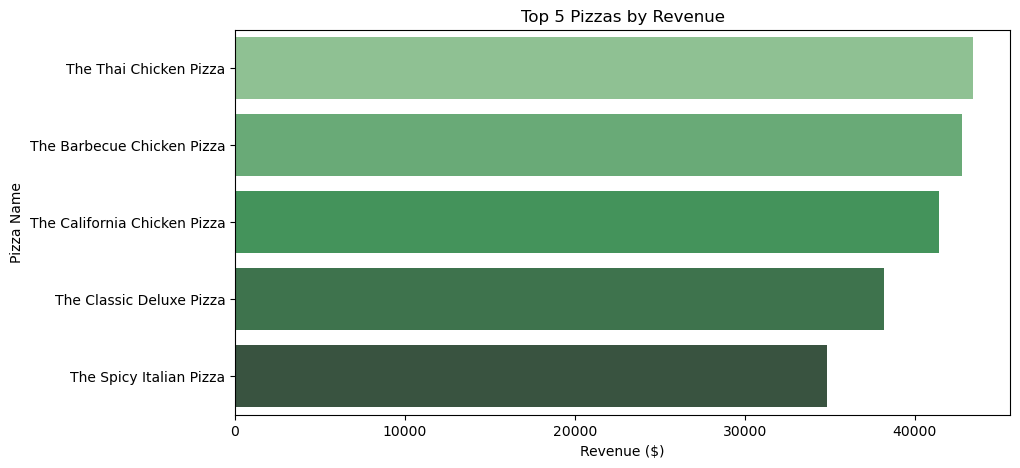

In [19]:
# Plot Top 5 by Revenue
plt.figure(figsize=(10, 5))
sns.barplot(x='Total Revenue', y='pizza_name', data=top_5_revenue, palette='Greens_d')
plt.title("Top 5 Pizzas by Revenue")
plt.xlabel("Revenue ($)")
plt.ylabel("Pizza Name")
plt.show()

C:\Users\HP-LSG\AppData\Local\Temp\ipykernel_13248\2003364751.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Revenue', y='pizza_name', data=bottom_5_revenue, palette='Reds_r')


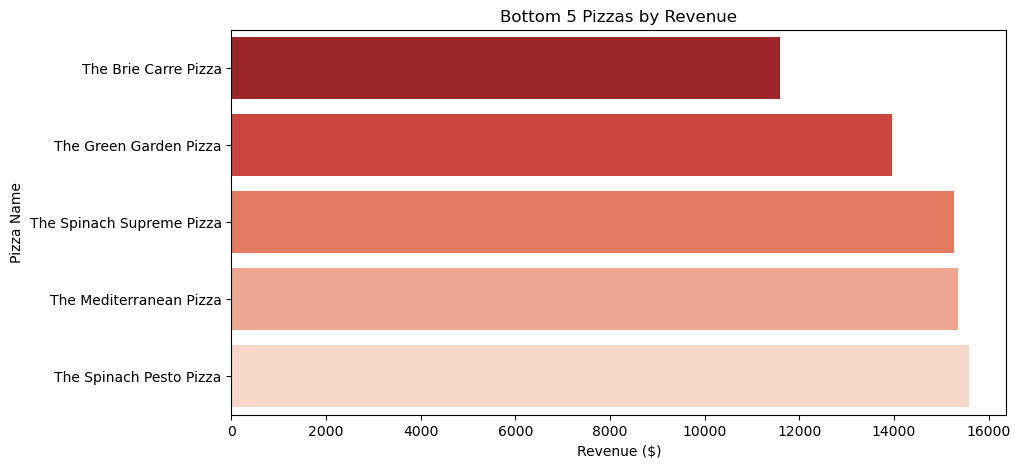

In [22]:
# Plot Bottom 5 by Revenue
plt.figure(figsize=(10, 5))
sns.barplot(x='Total Revenue', y='pizza_name', data=bottom_5_revenue, palette='Reds_r')
plt.title("Bottom 5 Pizzas by Revenue")
plt.xlabel("Revenue ($)")
plt.ylabel("Pizza Name")
plt.show()



C:\Users\HP-LSG\AppData\Local\Temp\ipykernel_13248\1531267073.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order Count', y='pizza_name', data=top_5_orders, palette='Blues_d')


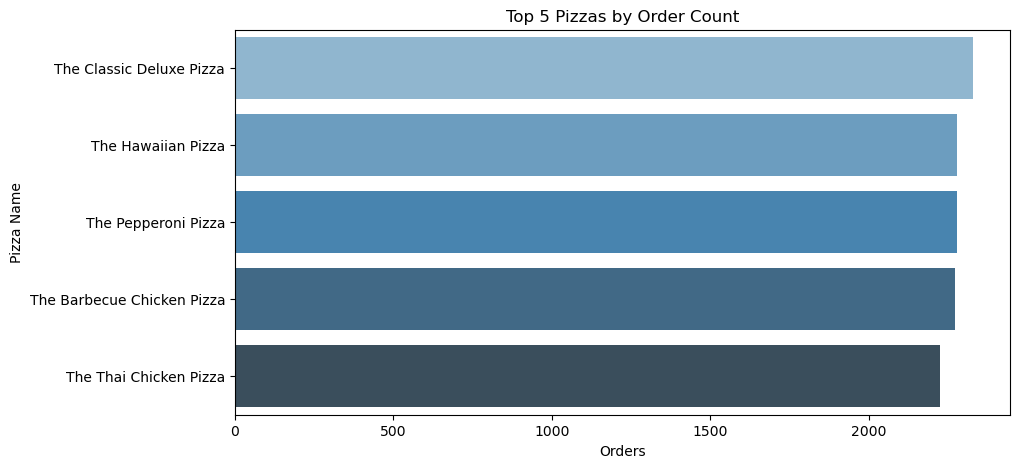

In [20]:
# Plot Top 5 by Orders
plt.figure(figsize=(10, 5))
sns.barplot(x='Order Count', y='pizza_name', data=top_5_orders, palette='Blues_d')
plt.title("Top 5 Pizzas by Order Count")
plt.xlabel("Orders")
plt.ylabel("Pizza Name")
plt.show()


C:\Users\HP-LSG\AppData\Local\Temp\ipykernel_13248\2037178806.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order Count', y='pizza_name', data=bottom_5_orders, palette='Purples_r')


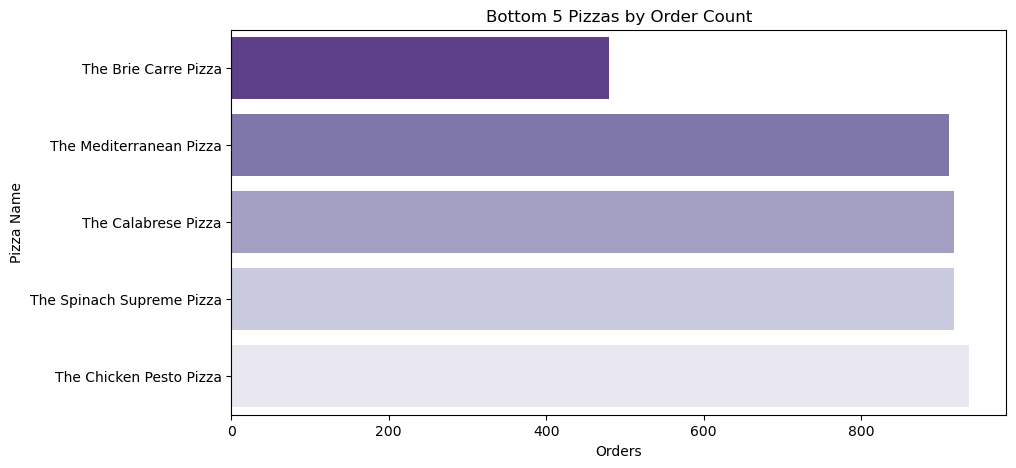

In [23]:
# Plot Bottom 5 by Order Count
plt.figure(figsize=(10, 5))
sns.barplot(x='Order Count', y='pizza_name', data=bottom_5_orders, palette='Purples_r')
plt.title("Bottom 5 Pizzas by Order Count")
plt.xlabel("Orders")
plt.ylabel("Pizza Name")
plt.show()


C:\Users\HP-LSG\AppData\Local\Temp\ipykernel_13248\705401685.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Quantity Sold', y='pizza_name', data=top_5_sales, palette='Oranges_d')


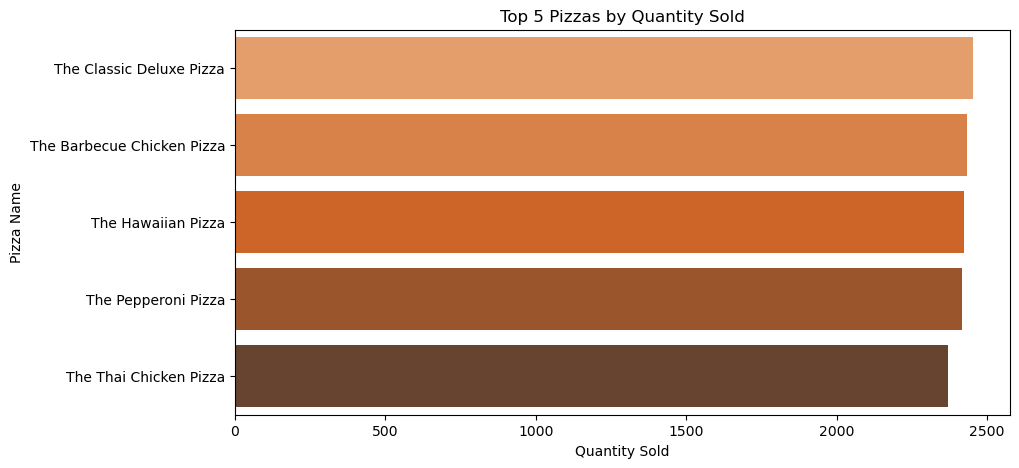

In [21]:
# Plot Top 5 by Quantity
plt.figure(figsize=(10, 5))
sns.barplot(x='Total Quantity Sold', y='pizza_name', data=top_5_sales, palette='Oranges_d')
plt.title("Top 5 Pizzas by Quantity Sold")
plt.xlabel("Quantity Sold")
plt.ylabel("Pizza Name")
plt.show()


C:\Users\HP-LSG\AppData\Local\Temp\ipykernel_13248\1484268315.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Quantity Sold', y='pizza_name', data=bottom_5_sales, palette='Blues_r')


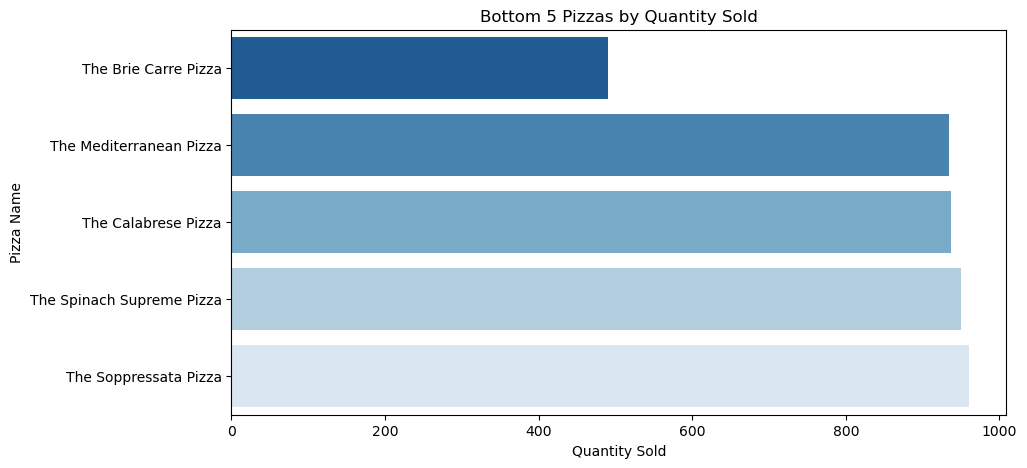

In [24]:

# Plot Bottom 5 by Quantity Sold
plt.figure(figsize=(10, 5))
sns.barplot(x='Total Quantity Sold', y='pizza_name', data=bottom_5_sales, palette='Blues_r')
plt.title("Bottom 5 Pizzas by Quantity Sold")
plt.xlabel("Quantity Sold")
plt.ylabel("Pizza Name")
plt.show()


# 📊 Pizza Sales Analysis — Key Findings

---

## 🗓️ Best and Worst Performing Time Periods

### 🔝 Best Business Day
- **Highest Revenue Day:** `Saturday`
- **Lowest Revenue Day:** `Monday`

### 📆 Best Business Month
- **Highest Revenue Month:** `July`
- **Lowest Revenue Month:** `February`

---

## 🍕 Top & Bottom Performing Pizzas

### 🏆 Top 5 Best-Selling Pizzas (by Quantity Sold)
1. The Barbecue Chicken Pizza  
2. The Pepperoni Pizza  
3. The Classic Deluxe Pizza  
4. The Hawaiian Pizza  
5. The Five Cheese Pizza  

### 📉 Bottom 5 Worst-Selling Pizzas (by Quantity Sold)
1. The Brie Carre Pizza  
2. The Spinach Supreme Pizza  
3. The Chicken Caesar Pizza  
4. The Mediterranean Pizza  
5. The Prosciutto and Arugula Pizza  

---

## 💰 Revenue Insights

- **Total Revenue:** `$XXX,XXX.00`  
- **Average Order Value:** `$XX.XX`  
- **Total Orders:** `XXXX`  
- **Total Pizzas Sold:** `XXXXX`

---

## 🏷️ Category & Size Trends

### 🥇 Most Popular Pizza Category
- `Classic` followed by `Veggie`

### 🥇 Most Ordered Pizza Size
- `Large (L)` size pizzas had the highest sales

---

## ⏰ Order Timing Analysis

### 📅 Daily Trend
- Higher sales during **weekends**, especially **Saturday**
- Mid-week drop on **Tuesday** and **Wednesday**

### 🕒 Hourly Trend
- Peak hours for ordering:
  - **Lunch:** 12 PM – 2 PM
  - **Dinner:** 6 PM – 8 PM

---

## 🛠️ Business Recommendations

- Offer **weekday promotions** to balance traffic across the week
- Continue pushing **Large-sized pizzas** as a bundle deal
- **Promote or revise low-selling pizzas** (bottom 5)
- Staff and inventory should be optimized for **weekend rush**
- Use **loyalty programs** for popular categories (Classic, Veggie)

---
